<a href="https://colab.research.google.com/github/nagamamo/international_finance/blob/main/5_international_banking_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4.　国際銀行融資のデータサイエンス：BISデータを用いた分析

本例では、国際決済銀行（Bank for International Settlements: BIS）が公表する国際銀行統計のバルクデータを用い、国際銀行融資の分析を行います。BISはもともと、第一次世界大戦の賠償金「決済」のための国際機関として1930年に設立されました。その後、時代の変遷とともに国際的な役割も変遷し、1960年代の英ポンド危機時の各国債務管理を経て、現代は各国中央銀行が株主として銀行監督を行う機能を携えています。バーゼル銀行監督委員会を擁するBISは、1970年代から現在までの国際銀行データを各国から収集し、刊行しています。このデータは1980年代以降整備され、N×(N－1)/2カ国の債権債務データがバルクデータとしてHPから公表されています。本例では、データの取得・整理・記述統計・可視化、を説明します。


In [1]:
#[1]ライブラリの読み込み
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

　次にBISのバルクデータを読み込みます。このバルクデータは、1979-2024年の四半期データです。BISのHPから得られるバルクデータは、巨大なため、次のスクリーニングを行った上で、本例では読み込みを行います。

(a) 投融資残高 or 投融資フロー　→　投融資残高(Stock)のみ
(b) 投融資の種類　→　全投融資(All Instruments）と貸出・預金(Loan and Deposits）
(c) 投融資先　→　全セクター(All Sector)
(d) 投融資形態　→　クロスボーダー投融資(crossborder）
(d) 債権債務のいずれか　→　投融資（全投融資or貸出)債権のみ

将来、国際銀行投融資のBISの国×国別データを使用する際は、[2]で読み込まれたデータから、「国名」「データ名」を確認してプログラムしてください。

In [ ]:
#[2]データの読み込み
url = "https://github.com/nagamamo/data/blob/main/5_bis_banking_2024.csv?raw=true"#Git-hubからCSVデータの入手
bis = pd.read_csv(url)#データフレームの作成
bis.head()

　上記で取得したデータから「ギリシャ」のデータを抽出し、整形します。尚、早稲田ビジネススクール「国際金融論」、横浜市立大学「国際金融論II」では、米国、英国、ドイツ、フランス、日本、香港の銀行が、次の国・地域への投融資をどの程度行ってきたのかを背景をもとに解説します。

アジア：日本　韓国　香港　シンガポール　マレーシア　インド　アラブ首長国連邦

欧州：ギリシャ　イタリア　スペイン　ロシア　ウクライナ

南米：ブラジル　アルゼンチン

In [ ]:
#[3]投融資国×資金借入国データの抽出
country=pd.DataFrame(bis[(bis["Counterparty country"] == "Japan")]) #投融資相手国をここで選択
country.drop(country.columns[[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,18,19,20,22,23,24,25,26,27,28,29,30]],axis=1, inplace=True) #不要な列の削除
country2=country.T #行列の転置
country2.columns = country2.iloc[0] #新変数名（列）の定義
country2.drop('Loans and deposits', axis=1, inplace=True) #投融資がAll InstrumentsかLoans and depositsかをここで選択（銀行融資のみの場合は後者）
#country2.drop('All instruments', axis=1, inplace=True) #投融資がAll InstrumentsかLoans and depositsかをここで選択（全投融資の場合は前者）
country2.columns = country2.iloc[1] #新変数名（列）を再定義
country4 = country2.drop(country2.index[[0,1,2]]) #不要な行の削除
country4 #データ確認

　本編は「国際金融論」における「国際銀行融資の分析」がテーマです。IMF加盟190カ国の国際収支は次の項目から構成されます。

※国際収支の構成

(A) 経常収支　貿易サービス収支・第一次所得収支・第二次所得収支他

(B) 金融収支　外国直接投資・国際証券投資・その他投資・外貨準備


　国際収支表は(A)=(B)となるべく作成されています。そして「国際銀行融資」は「その他投資・外貨準備」に含まれます。
　IMFのデータではこの国際銀行融資のみを取り出すことはできませんが、BISは国・地域×国・地域ごとの銀行融資データが公表されています。

In [ ]:
#[4]国際融資データ行列の転置と前処理
country4=country4[['United States','France','United Kingdom','Hong Kong SAR','Germany']] #日本への国際銀行投融資
#country4=country4[['France','United Kingdom','Hong Kong SAR','Japan']] #米国の国際銀行投融資
#country4=country4[['United States','France','United Kingdom','Germany','Japan']] #その他の国・地域への国際銀行投融資
#country4=country2[['United States','France','United Kingdom','Germany']]
country4 #データ確認

In [ ]:
#[5]国際投融資統計の記述統計
country4['United States'] =country4['United States'].astype('float') #数値データへの変換
country4['United Kingdom'] =country4['United Kingdom'].astype('float') #数値データへの変換
country4['France'] =country4['France'].astype('float') #数値データへの変換
country4['Hong Kong SAR'] =country4['Hong Kong SAR'].astype('float') #数値データへの変換
country4['Germany'] =country4['Germany'].astype('float') #数値データへの変換
#country4['Japan'] =country4['Japan'].astype('float') #数値データへの変換
country4.describe() #記述統計

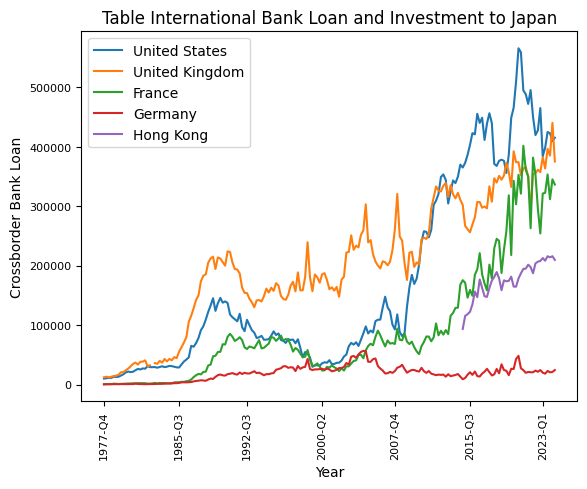

In [6]:
#[6]可視化
plt.xticks(rotation=90) #横軸ラベルを90度回転
plt.xlabel("Year") #横軸タイトル
plt.ylabel("Crossborder Bank Loan") #縦軸タイトル
plt.tick_params(labelsize=8) #横軸ラベルのサイズ
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.title('Table International Bank Loan and Investment to Japan') #図表タイトル
plt.plot(country4['United States'], label='United States')
plt.plot(country4['United Kingdom'], label='United Kingdom')
plt.plot(country4['France'], label='France')
plt.plot(country4['Germany'], label='Germany')
plt.plot(country4['Hong Kong SAR'], label='Hong Kong')
#plt.plot(country4['Japan'], label='Japan')

plt.legend()

　本例では最後に、可視化した国際銀行融資の平均値の差の検定を行います。以下ではcountry4と名付けられたデータフレイム内の変数であるGermanyとFrance,すなわちドイツとフランスに拠点を置くBIS報告銀行の（例えば）日本向け融資の平均値の違いを検定します。平均値の差の検定手段は2種類です。ひとつは正規分布を仮定することで平均値の差の検定を行うスチューデントのｔ検定（パラメトリック検定）と、もうひとつは正規分布を前提としないウィルコクソンの順位和検定（ノンパラメトリック検定）の2種類です。この2つの検定結果が有意であれば、正規分布の前提の有無に関わらず、この2変数間の平均値（中央値）には統計的に差があることが支持されます。下記のt検定の例ではalternative='two-sided'と記述することで両側検定を行います。

In [ ]:
#[7] 平均値の差の検定：スチューデントのt検定
from scipy import stats
#dif=country4['Germany'].mean()-country4['France'].mean() #平均値の差の算出
#dif #平均値の差の表示
stats.ttest_ind(country4['Germany'],country4['France'], alternative='two-sided')

In [ ]:
#[8] ウィルコクソン順位和検定
stats.mannwhitneyu(country4['Germany'],country4['France'])